In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [3]:
# Load the Boston Housing Dataset from sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())
print(boston_dataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

C:\Users\Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [4]:
# Create the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


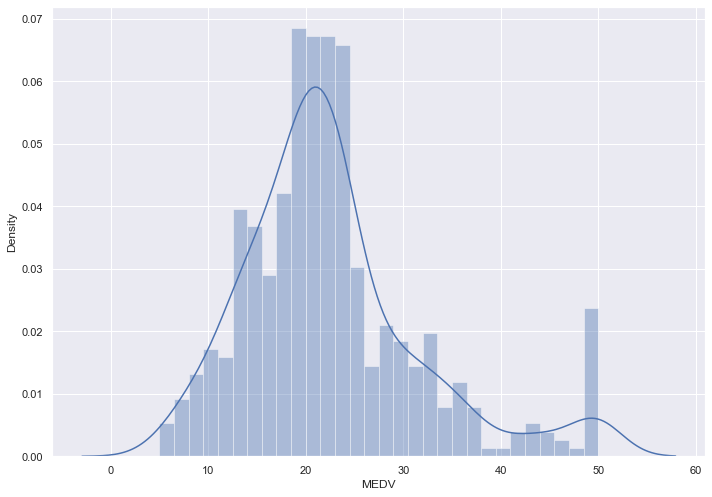

<AxesSubplot:>

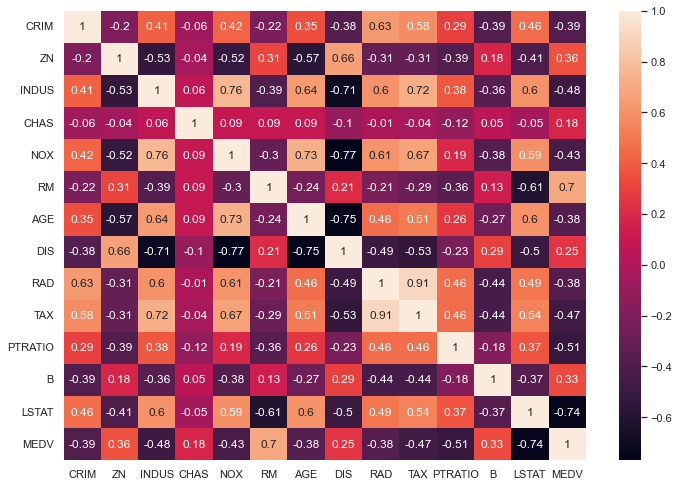

In [5]:
# Introductory Data Analysis
# First, let us make sure there are no missing values or NANs in the dataset
print(boston.isnull().sum())

# Next, let us plot the target vaqriable MEDV

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

# Finally, let us get the correlation matrix
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

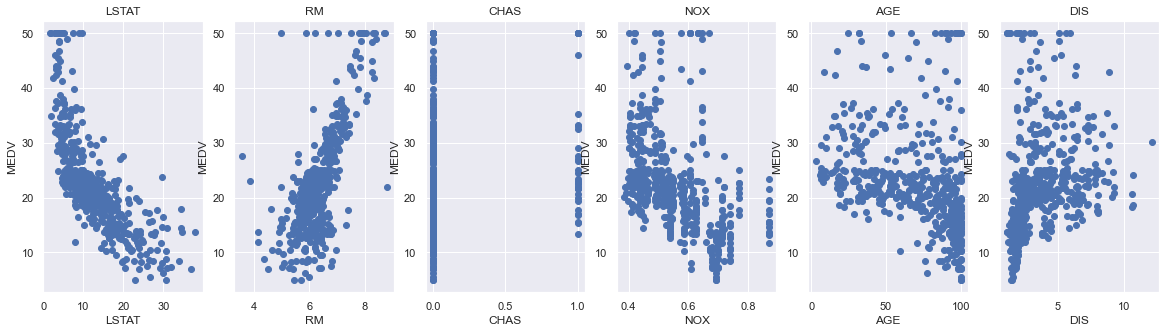

In [6]:
# Let us take few of the features and see how they relate to the target in a 1D plot
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','CHAS','NOX','AGE','DIS']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
from sklearn.model_selection import train_test_split
X = boston.to_numpy()
X = np.delete(X, np.s_[13:14], 1)
#y = boston.to_numpy()
#y = np.delete(y, np.s_[:-1], 1)
y = boston['MEDV'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)
print(X_train.shape)
print(X_test.shape)
y_train = np.array([[x] for x in y_train])
y_test = np.array([[x] for x in y_test])
print(y_train.shape)
print(y_test.shape)

(404, 13)
(404, 14)
(102, 14)
(404, 1)
(102, 1)


In [16]:
# Lets now train the model
def linear_regression(X, Y, learning_rate, max_iter):
    m = Y.size
    w = np.zeros((14, 1)) # initializes wx+b
    loss = 0
    for i in range(max_iter):
        y_pred = np.dot(X, w) # wTx+b
        new_loss = (1/m)*np.sum(np.square(y_pred - Y)) # calculates loss using squared loss function
        gradient = (1/m)*2*np.dot(X.transpose(), y_pred - Y)
        w = w - learning_rate*gradient
        if ((abs(new_loss - loss) <= 1e-5)): # additional convergence condition
            print("Exited at the " + str(i) + "th iteration.")
            break
        else:
            loss = new_loss
    return w
learning_rate = 0.0000032
max_iter = 1000000 # maximum iterations
w = linear_regression(X_train, y_train, learning_rate, max_iter)

Exited at the 342410th iteration.


In [9]:
# Model Evaluation
# Lets first evaluate on training set
from sklearn.metrics import r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
y_pred_train = np.resize(np.dot(X_train,w),(1,np.dot(X_train,w).shape[0]))[0]
y_train = np.resize(y_train,(1,y_train.shape[0]))[0]
rmse_train = rmse(y_pred_train, y_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))

# Let us now evaluate on the test set
y_pred_test = np.resize(np.dot(X_test,w),(1,np.dot(X_test,w).shape[0]))[0]
y_test = np.resize(y_test,(1,y_test.shape[0]))[0]
rmse_test = rmse(y_pred_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

# Finally, let us see the learnt weights!
np.set_printoptions(precision=3)
print(w.T[0])

Training RMSE = 5.133405194284845
Training R2 = 0.6932325013910623
Test RMSE = 5.084037583747075
Test R2 = 0.6698663818675428
[ 4.631e-01 -1.273e-01  7.201e-02 -1.772e-03  4.779e-01  2.073e-01
  4.345e+00  2.368e-02 -7.615e-01  2.123e-01 -9.578e-03 -1.360e-01
  2.050e-02 -5.990e-01]
